<img src="https://github.com/leticiaalmnunes/MQMFuzzy_HubbleLaw/blob/main/imagens/logos_ilum_fundobranco.PNG?raw=true" width="900">

## <center> Construção de dados fuzzy triangulares a partir de um conjunto de dados reais
    
**Autoria:** `Letícia Nunes` <br>
**Orientação:** `Vinícius Francisco Wasques`
    
---

<div class= 'alert alert-warning'> <b>ATENÇÃO!</b></div>

O propósito desse caderno é esclarecer como se dá a "_fuzzyficação_" de dados reais. Tudo que está sendo feito abaixo pode ser realizado de maneira automática usando a função `turn_fuzzy` do script `Fuzzy_functions` que está disponível no [Github](https://github.com/leticiaalmnunes/MQMFuzzy_HubbleLaw) do projeto.

---

### Passo a passo:

i. <b>Ajuste de curva clássico</b><br>
Para exemplificarmos o processo, usamos um conjunto de dados que tem um comportamento linear e, por isso, usamos uma função afim ($y=ax+b$) para calcularmos o diâmetro dos números fuzzy. Ou seja, a função mais adequada para o ajuste vai depender dos dados sendo utilizados em cada problema, podendo ser um polinômio de grau maior que um, uma função periódica, exponencial etc. <br><br>

ii. <b>Cálculo do erro absoluto</b><br>
A partir dos coeficientes $a$ e $b$ encontrados, foi possível obter os valores de $y$ previstos pela função para cada dado de entrada e obter o erro absoluto ($\sigma$) para cada dado.

$$\sigma = \left| y_{\text{real}} - y_{\text{previsto}} \right| $$


iii. <b>Criação dos números fuzzy</b><br>
Usamos aqui o formato mais simples de número fuzzy: o triângulo isóceles. Assim, temos que $\text{diam}(Y) = 2\sigma$ e:

$$Y = (y_{\text{real}}-\sigma, \ y_{\text{real}}, \ y_{\text{real}}+\sigma)$$

iv. <b>Geração do novo dataset</b><br>
Com os dados obtidos, criamos um novo dataset que pode ser facilmente salvo em um novo arquivo. Aqui, optamos por guardá-los em um arquivo `.txt`. <br><br>

v. <b>Função final</b>  <br>
Como exemplo, usamos alguns dados do satélite Hubble que foram extraídos do artigo (Wendy L. Freedman et al 2001) e disponibilizados em um [repositório GitHub](https://github.com/lrochacastro/Projeto-Final-Introducao-a-Computacao-em-Fisica) público. Esses dados precisaram passar por um breve tratamento antes de serem importados neste caderno e você pode encontrar o arquivo pronto para ser processado no [nosso Git](https://github.com/LuzMendes/Metodos-de-Quadrados-Minimos-Fuzzy).

### Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Script disponível no GitHub
import Fuzzy_functions as Ff

### Tratamento dos dados

In [2]:
df = pd.read_csv('data_Hubble.txt') # dados reais
df.columns = ['Distância (Mpc)', 'Velocidade (km/s)'] # dando nome às colunas
display(df.head(5))

,Distância (Mpc),Velocidade (km/s)
0,56.0,4124
1,58.0,4227
2,66.8,4847
3,71.8,3424
4,77.9,5434


### Visualizando os dados

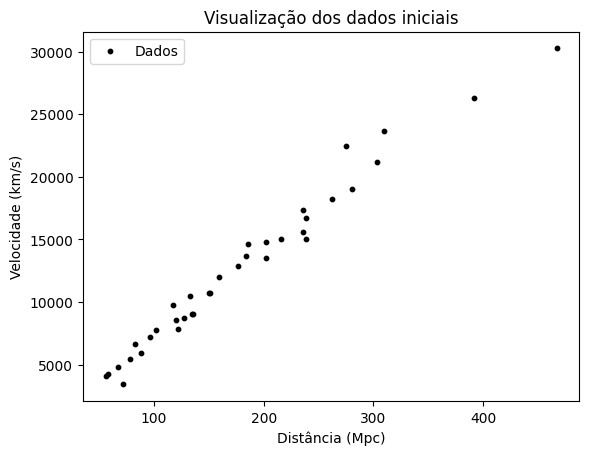

In [3]:
X = df['Distância (Mpc)']
y_true = df['Velocidade (km/s)']

plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.title('Visualização dos dados iniciais')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade (km/s)')
plt.legend();

### Ajuste linear clássico

In [4]:
a, b = np.polyfit(X, y_true, deg=1)

print("Coeficiente angular a =", a)
print("Coeficiente linear b =", b)

print(f"\ny = {round(a,2)}x + {round(b,2)}")

y_prev = a*X +b

Coeficiente angular a = 67.82251608596026
Coeficiente linear b = 529.5774353211324

y = 67.82x + 529.58


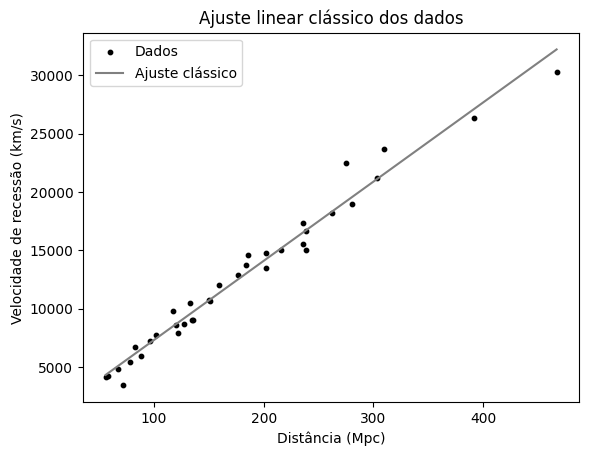

In [5]:
plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.plot(X, y_prev, color='grey', label='Ajuste clássico')    

plt.title('Ajuste linear clássico dos dados')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade de recessão (km/s)')
plt.legend();

---

Agora, construiremos os números fuzzy como triângulos isóceles, usando o erro absoluto do ajuste para cada ponto como metade do diâmetro do respectivo ponto.

In [6]:
def cria_fuzzy_tri_iso (lista_y, meio_diametro): # Função disponível no scripy "Fuzzy_functions"
    """Cria, a partir de uma lista ou dataframe de pontos e uma lista com seus respectivos diâmetros divididos por 2,
    números fuzzy triangulares isóceles.
    Retorna os valores em uma lista de tuplas."""
    
    triplas = []
    for y, meio_diam in zip (lista_y, meio_diametro):
        triplas.append( tuple(((y-meio_diam), y, (y+meio_diam))) )
    
    return triplas

In [7]:
meio_diametro = []

for y_t, y_p in zip(y_true, y_prev):
    meio_diametro.append(abs(y_t-y_p))

Y = cria_fuzzy_tri_iso(y_true, meio_diametro)

Abaixo, podemos visualizar como ficou a construção desses dados.

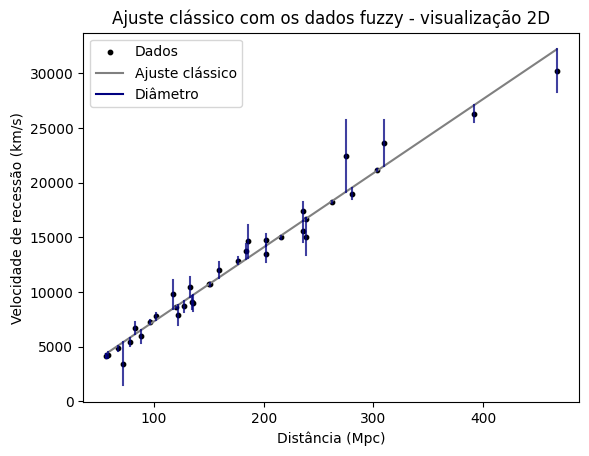

In [8]:
plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.plot(X, y_prev, color='grey', label='Ajuste clássico')    

for i, x in enumerate(X):
    if i == 0:
        plt.plot((x,x,x), Y[i], color='navy', label='Diâmetro')
    else:
        plt.plot((x,x,x), Y[i], color='navy', alpha=.75)

plt.title('Ajuste clássico com os dados fuzzy - visualização 2D')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade de recessão (km/s)')
plt.legend();

### Construindo um novo dataframe com os dados fuzzy

In [9]:
df_fuzzy = pd.DataFrame()
df_fuzzy['Distância (Mpc)'] = X
df_fuzzy['Velocidade (km/s)'] = Y

display(df_fuzzy.head(5))

,Distância (Mpc),Velocidade (km/s)
0,56.0,"(3920.361663865093, 4124, 4327.638336134907)"
1,58.0,"(3990.7166316931725, 4227, 4463.2833683068275)"
2,66.8,"(4633.878490136723, 4847, 5060.121509863277)"
3,71.8,"(1448.7659097069209, 3424, 5399.234090293079)"
4,77.9,"(5055.048561582563, 5434, 5812.951438417437)"


---

### Criando a função

Unindo os passos que foram executados nas células acima, chegamos na seguinte função:

In [10]:
def turn_fuzzy (df):
    """A partir de um conjunto de dados com valores reais, com uma variável independente 'x' e uma dependente 'y',
    transforma os valores de 'y' em números fuzzy triangulares isóceles por meio de um ajuste linear clássico.
    
    Args:
        df: Tabela com os dados no formato de números reais. Pandas DataFrame.
        
    Returns:
        df_fuzzy: Tabela com os dados no formato de números fuzzy. Pandas DataFrame.
    """
    cols = df.columns
    assert len(cols)==2
    
    X, y_true = df[cols[0]], df[cols[1]]
    
    # Ajuste linear
    a, b = np.polyfit(X, y_true, deg=1)
    y_prev = a*X +b
    
    # "Fuzzyficando"
    meio_diametro = [abs(y_t-y_p) for y_t, y_p in zip(y_true, y_prev)]
    Y = Ff.cria_fuzzy_tri_iso(y_true, meio_diametro)
    
    # Novo dataframe
    df_fuzzy = pd.DataFrame()
    df_fuzzy[0] = X
    df_fuzzy[1] = Y
    df_fuzzy.columns = cols
    
    return df_fuzzy

In [11]:
df_Fuzzy = turn_fuzzy(df)
display(df_Fuzzy.head(5))

# df_Fuzzy.to_csv('Hubble_fuzzy.txt', index=False) ### descomente essa linha para salvar um arquivo txt como os novos dados

,Distância (Mpc),Velocidade (km/s)
0,56.0,"(3920.361663865093, 4124, 4327.638336134907)"
1,58.0,"(3990.7166316931725, 4227, 4463.2833683068275)"
2,66.8,"(4633.878490136723, 4847, 5060.121509863277)"
3,71.8,"(1448.7659097069209, 3424, 5399.234090293079)"
4,77.9,"(5055.048561582563, 5434, 5812.951438417437)"


---

### Referências

1. <b> Dados do Hubble Telescope (Wendy L. Freedman et al 2001).</b> https://iopscience.iop.org/article/10.1086/320638

2. <b>Repositório que extraiu os dados do artigo e os disponibilizou. (Castro L., 2024) </b> https://github.com/lrochacastro/Projeto-Final-Introducao-a-Computacao-em-Fisica

---